In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Preparing the Data

A simple linear is defined given below

In [2]:
def linear_function(x):
    return (3*x)+2

# Generate some random points as the features
random_points = np.linspace(-5, 5 , 1000)

In [3]:
random_points_dataset = pd.DataFrame(random_points , columns= ['X'])
random_points_dataset.head()

,X
0,-5.00000
1,-4.98999
2,-4.97998
3,-4.96997
4,-4.95996


Now substitute the random points(features) in the linear equation

In [4]:
Y = random_points_dataset['X'].transform(linear_function)
Y.head()

0   -13.00000
1   -12.96997
2   -12.93994
3   -12.90991
4   -12.87988
Name: X, dtype: float64

Lets add some gaussian noise to the perfectly linar data to simulate the real life example of the data

In [5]:
gaussian_noise = np.random.normal(0, 0.01, 1000)
abs(gaussian_noise).mean()

0.008142459331249075

In [6]:
Y_noise_added = 100*gaussian_noise + Y
Y_noise_added.name  = 'Y'
Y_noise_added.head()

0   -12.760038
1   -11.738175
2   -14.580227
3   -13.639874
4   -12.680454
Name: Y, dtype: float64

Create a vector of ones. This vector in the feature matrix will help us finding the bias(intercept) of the linear equation.

In [7]:
ones = np.ones(1000)
ones = pd.DataFrame(ones, columns= ['Ones'])

In [8]:
dataframe = pd.concat([random_points_dataset,ones,  Y_noise_added], axis=1)


In [9]:
dataframe.head()

,X,Ones,Y
0,-5.00000,1.0,-12.760038
1,-4.98999,1.0,-11.738175
2,-4.97998,1.0,-14.580227
3,-4.96997,1.0,-13.639874
4,-4.95996,1.0,-12.680454


Here the columns "X" and ones make up the feature matrix and the Y column makes up the responce vector.
Now lets plot the data we have prepared to visualise how it looks.

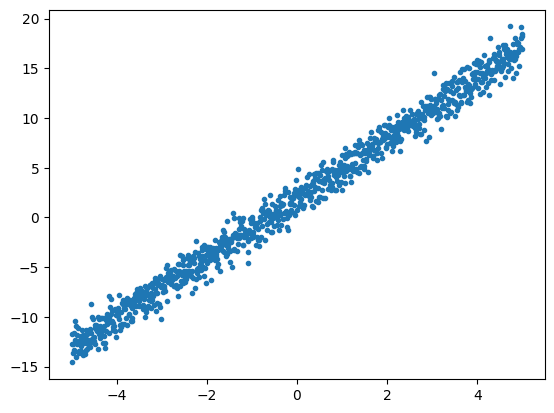

In [10]:
plt.scatter(dataframe.X, dataframe.Y, marker= '.')

### Calculating the optimal weights and bias

Now we separate the feature matrix form the responce vector

In [11]:
A = dataframe.drop(['Y'], axis= 1)
A

,X,Ones
0,-5.00000,1.0
1,-4.98999,1.0
2,-4.97998,1.0
3,-4.96997,1.0
4,-4.95996,1.0
...,...,...
995,4.95996,1.0
996,4.96997,1.0
997,4.97998,1.0
998,4.98999,1.0


In [12]:
# Converting the dataframe to an numpy array
A = A.values
A

array([[-5.        ,  1.        ],
       [-4.98998999,  1.        ],
       [-4.97997998,  1.        ],
       ...,
       [ 4.97997998,  1.        ],
       [ 4.98998999,  1.        ],
       [ 5.        ,  1.        ]])

Now lets calcualate the pseudo-inverse of the feature matrix using the inbult fuction from the numpy library

In [13]:
psedo_inv = np.linalg.pinv(A)
psedo_inv.shape

(2, 1000)

In [14]:
y = dataframe.Y.values

In [15]:
y.shape

(1000,)

Now we multiply the pseudo inverse with the response vector for the weights and intercept. The first element of the array gives the slope and the intercept is the second element.

In [16]:
np.matmul(psedo_inv, y)

array([3.0039298 , 1.97549156])

lets plot the predicted line and the scatter the data points

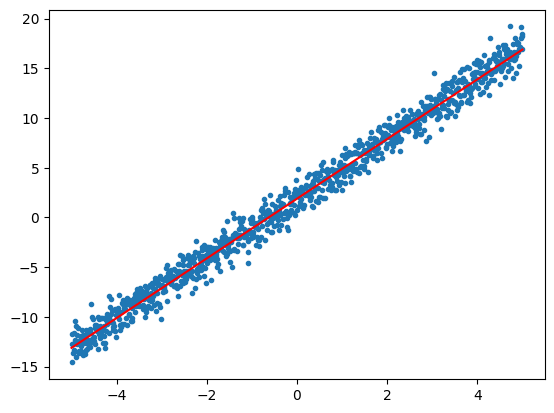

In [17]:
plt.scatter(dataframe.X, dataframe.Y, marker= '.')
plt.plot([-5, 5], [(2.99954417 * (-5)) + 1.88656097, (2.99954417 * (5)) + 1.88656097], color = 'r')

The line fits the data pretty well !!